In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [119]:
df = pd.read_excel('S3P5_Data.xlsx',sheet_name='Sheet1')

In [120]:
df.head()

,InspResultID,MftNo,PolishingDate,BatchNo,TIR142,Batch,Linear Sensor,Actual Press,UP Current,LP Current,UP Position
0,9851,19906001,2019-09-20,1,0.272,1,-1.62,3.33,-31.84,-29.75,1.29
1,9852,19906001,2019-09-20,1,0.151,1,-1.62,3.33,-31.84,-29.75,1.29
2,9853,19906001,2019-09-20,1,0.216,1,-1.62,3.33,-31.84,-29.75,1.29
3,9854,19906001,2019-09-20,1,0.175,1,-1.62,3.33,-31.84,-29.75,1.29
4,9855,19906001,2019-09-20,1,0.311,1,-1.62,3.33,-31.84,-29.75,1.29


In [121]:
len(df)

10243

Analyzing Data

In [122]:
df.isnull().sum()

InspResultID     0
MftNo            0
PolishingDate    0
BatchNo          0
TIR142           0
Batch            0
Linear Sensor    0
Actual Press     0
UP Current       0
LP Current       0
UP Position      0
dtype: int64

Train Data


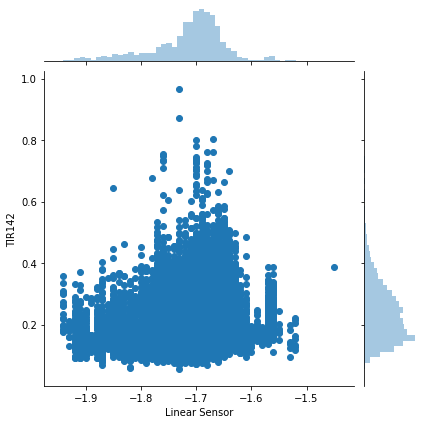

In [123]:
sns.jointplot(x='Linear Sensor', y='TIR142',data=df)

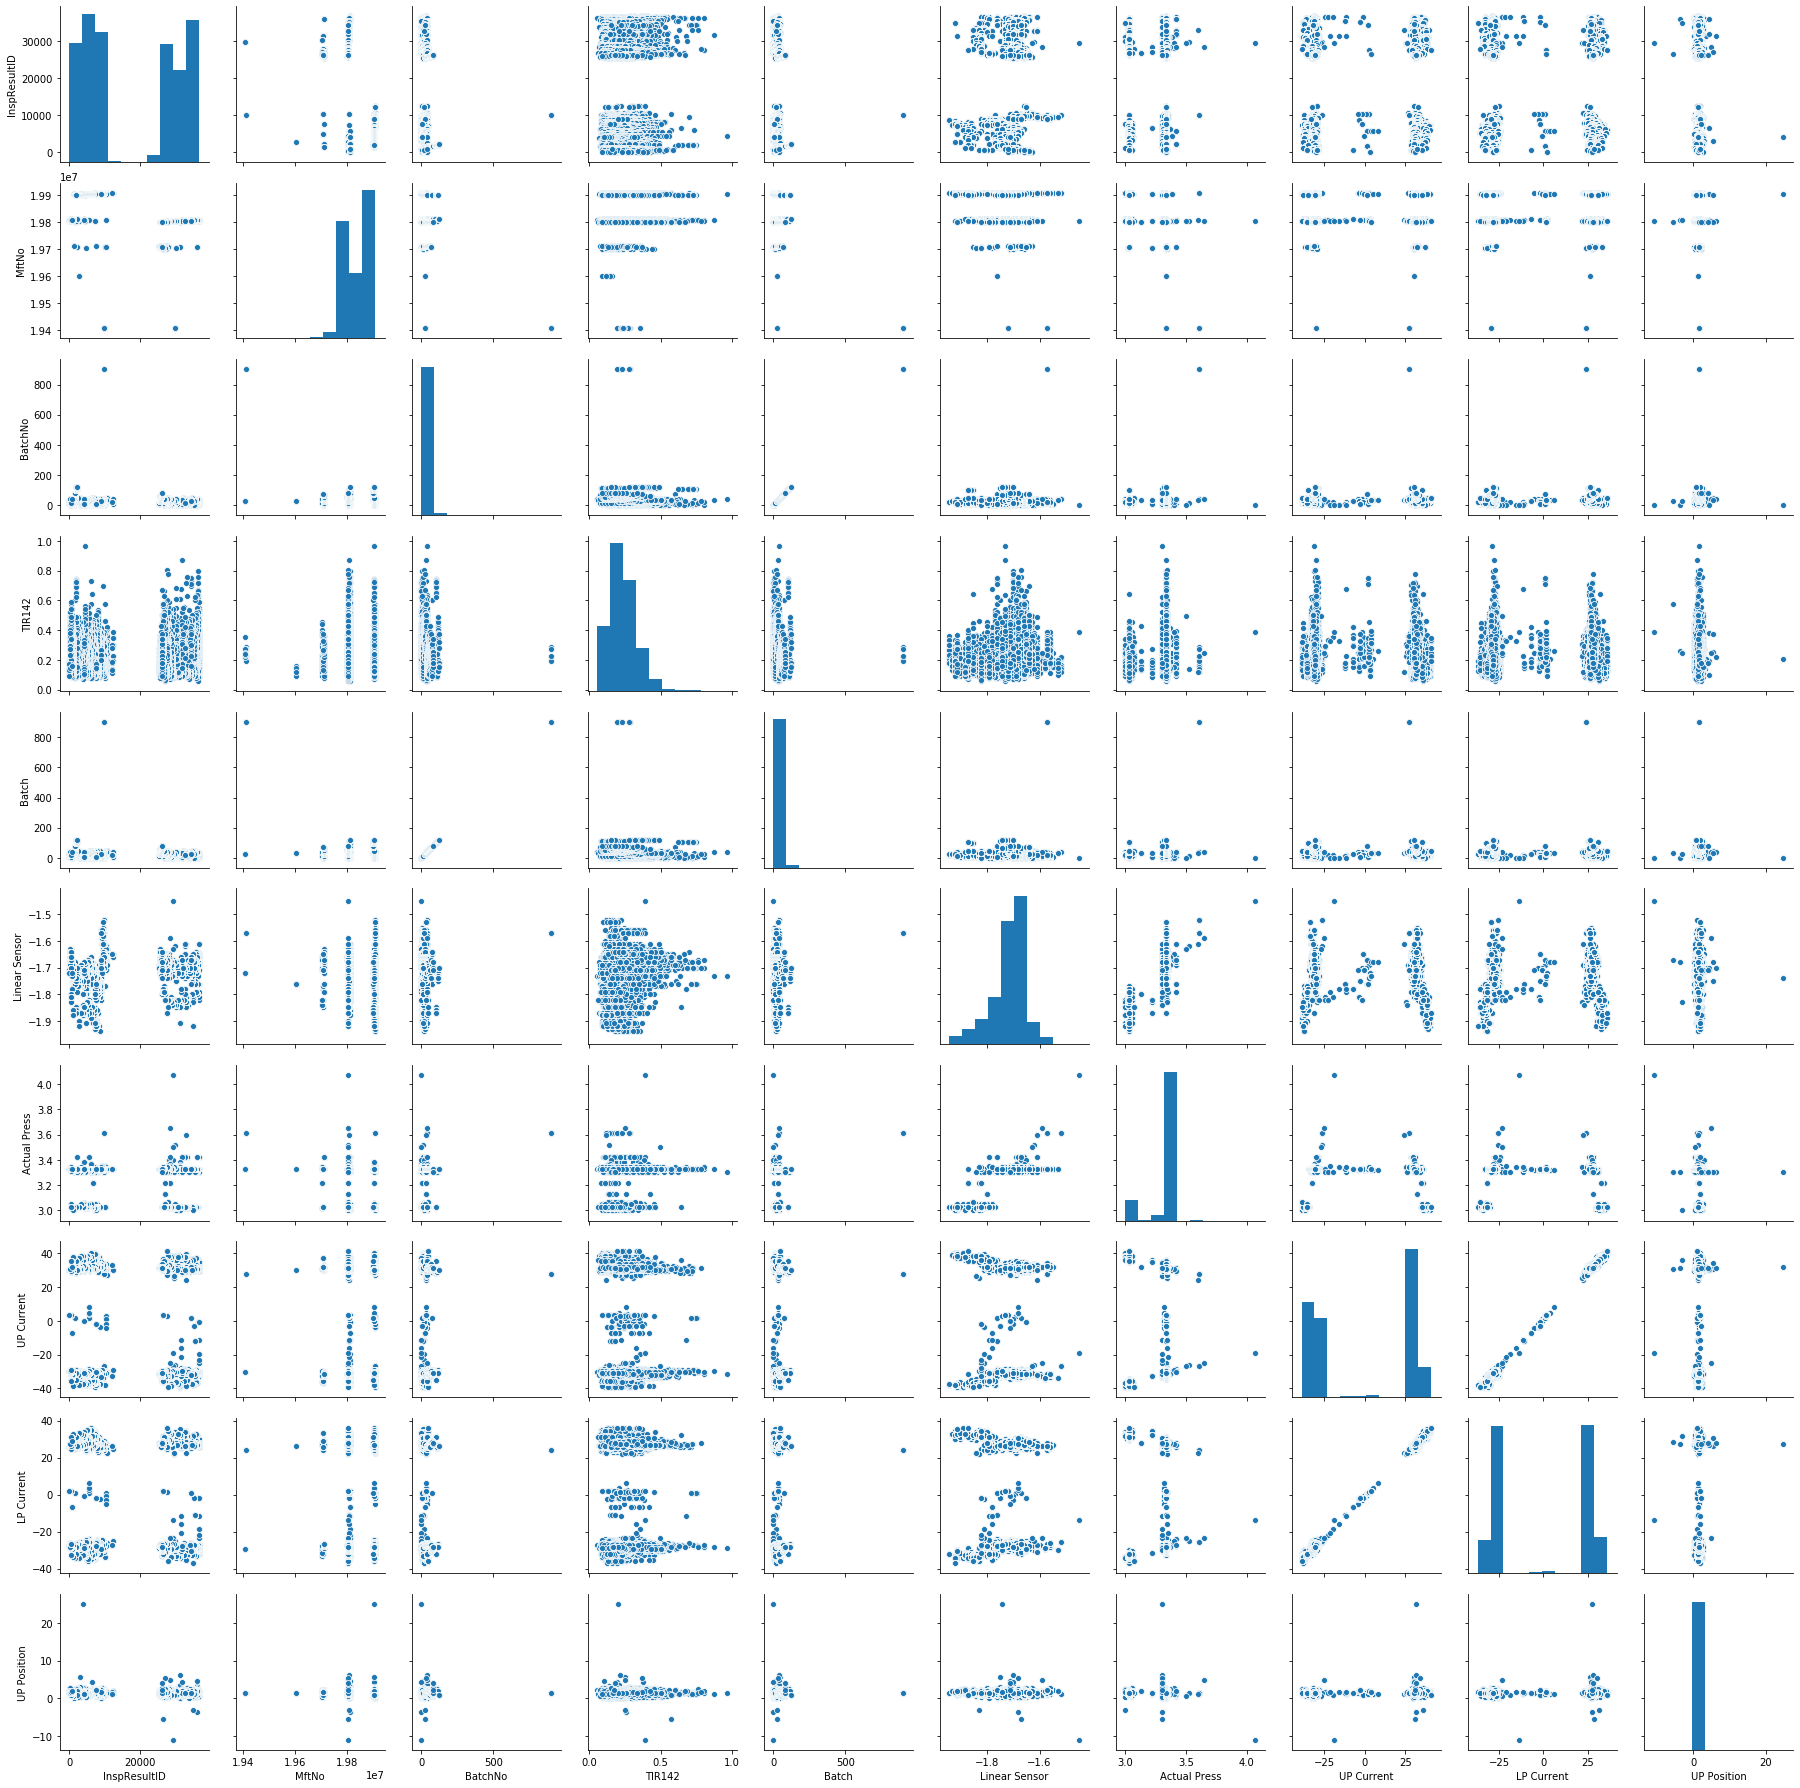

In [124]:
sns.pairplot(df)

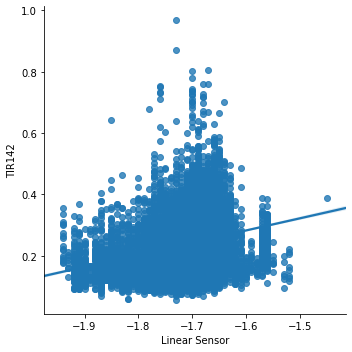

In [125]:
sns.lmplot(x='Linear Sensor', y='TIR142',data=df)

Training and Testing Data

In [126]:
y = df['TIR142']

In [127]:
df.columns

Index(['InspResultID', 'MftNo', 'PolishingDate', 'BatchNo', 'TIR142', 'Batch',
       'Linear Sensor', 'Actual Press', 'UP Current', 'LP Current',
       'UP Position'],
      dtype='object')

In [128]:
X = df[['Linear Sensor', 'Actual Press', 'UP Current', 'LP Current','UP Position']]

In [129]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

Training the Model

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
#Create an instance of a LinearRegression() model 
lm = LinearRegression()


In [135]:
#fit lm on the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
lm.coef_

array([ 2.61636966e-01,  1.13042259e-01,  7.12398416e-05, -1.45608769e-04,
       -6.88950960e-03])

In [137]:
predictions = lm.predict(X_test)
predictions

array([0.2392369 , 0.22615703, 0.24827336, ..., 0.24679524, 0.17027434,
       0.24581788])

Text(0, 0.5, 'Predicted Y')

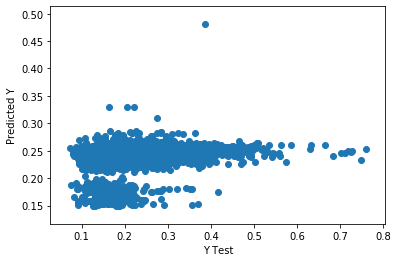

In [138]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [139]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07134274539790951
MSE: 0.008634396189613015
RMSE: 0.09292145171925058


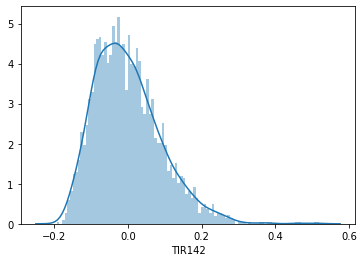

In [112]:
sns.distplot((y_test-predictions),bins=100)

In [111]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Linear Sensor,0.287837
Actual Press,0.100255
UP Current,-0.000338
LP Current,0.000369
UP Position,-0.005610
